In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_15_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_15_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.007)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 4s - loss: 0.3599 - accuracy: 0.8495 - val_loss: 0.2762 - val_accuracy: 0.8794
Epoch 2/150
100000/100000 - 4s - loss: 0.2580 - accuracy: 0.8864 - val_loss: 0.2482 - val_accuracy: 0.8915
Epoch 3/150
100000/100000 - 4s - loss: 0.2387 - accuracy: 0.8947 - val_loss: 0.2388 - val_accuracy: 0.8968
Epoch 4/150
100000/100000 - 3s - loss: 0.2258 - accuracy: 0.9010 - val_loss: 0.2338 - val_accuracy: 0.8973
Epoch 5/150
100000/100000 - 3s - loss: 0.2150 - accuracy: 0.9066 - val_loss: 0.2124 - val_accuracy: 0.9079
Epoch 6/150
100000/100000 - 3s - loss: 0.2021 - accuracy: 0.9131 - val_loss: 0.2021 - val_accuracy: 0.9140
Epoch 7/150
100000/100000 - 3s - loss: 0.1912 - accuracy: 0.9176 - val_loss: 0.1904 - val_accuracy: 0.9185
Epoch 8/150
100000/100000 - 3s - loss: 0.1813 - accuracy: 0.9205 - val_loss: 0.1804 - val_accuracy: 0.9205
Epoch 9/150
100000/100000 - 3s - loss: 0.1712 - accuracy: 0.9236 - val_loss: 0.1689 - val_accu

Epoch 77/150
100000/100000 - 3s - loss: 0.0480 - accuracy: 0.9811 - val_loss: 0.0658 - val_accuracy: 0.9744
Epoch 78/150
100000/100000 - 4s - loss: 0.0463 - accuracy: 0.9817 - val_loss: 0.0671 - val_accuracy: 0.9743
Epoch 79/150
100000/100000 - 4s - loss: 0.0457 - accuracy: 0.9819 - val_loss: 0.0636 - val_accuracy: 0.9771
Epoch 80/150
100000/100000 - 3s - loss: 0.0462 - accuracy: 0.9819 - val_loss: 0.0636 - val_accuracy: 0.9757
Epoch 81/150
100000/100000 - 3s - loss: 0.0456 - accuracy: 0.9822 - val_loss: 0.0652 - val_accuracy: 0.9754
Epoch 82/150
100000/100000 - 3s - loss: 0.0456 - accuracy: 0.9823 - val_loss: 0.0718 - val_accuracy: 0.9728
Epoch 83/150
100000/100000 - 3s - loss: 0.0441 - accuracy: 0.9827 - val_loss: 0.0661 - val_accuracy: 0.9760
Epoch 84/150
100000/100000 - 4s - loss: 0.0460 - accuracy: 0.9822 - val_loss: 0.0671 - val_accuracy: 0.9761
Epoch 85/150
100000/100000 - 3s - loss: 0.0454 - accuracy: 0.9825 - val_loss: 0.0719 - val_accuracy: 0.9749
Epoch 86/150
100000/100000 -

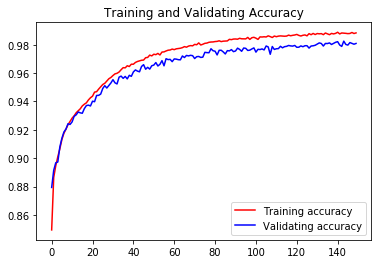

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_15_3_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')